## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [103]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# Loads in data from in-house dataset into a DataFrame
df = pd.read_excel("../../data/raw/realestate.xlsx")

# Prints the number of missing values (null) in each column
df.isnull().sum()

No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [105]:
# Dictionary used to rename columns; shortens and makes names more pythonic
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

df_rename = df.rename(columns=rename_dict)

df_rename.columns

Index(['No', 'house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat',
       'long', 'price_unit_area'],
      dtype='object')

In [106]:
# List used to remove columns irrelevant to analysis
selected = ["lat", "long", "No"]

df_drop = df_rename.drop(columns=selected)

In [107]:
# Converts data in "distance_to_mrt" from string to float
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip("\"")

df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].astype("float")

In [108]:
# Prints (num. of rows, num. of columns) tuple of DataFrame
df_drop.shape

(414, 4)

In [114]:
# Removes rows with any missing values (null); changes the shape of DataFrame
df_drop = df_drop.dropna()
df_drop.shape

(403, 4)

## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [115]:
# Prints summary statistics (count, mean, standard deviation, min, max, and
# percentiles) of numeric columns in new DataFrame, ignores object/string columns
print(df_drop.describe())

        house_age  distance_to_mrt  num_convenience_stores  price_unit_area
count  403.000000       403.000000              403.000000       403.000000
mean    18.607196      1070.118896                4.292804        38.106452
std     22.656541      1255.001088                5.636027        13.610588
min      0.000000        23.382840               -6.000000         7.600000
25%      8.700000       289.324800                1.000000        27.700000
50%     16.100000       492.231300                4.000000        38.600000
75%     28.300000      1442.932500                6.000000        46.600000
max    410.300000      6488.021000              100.000000       117.500000


In [122]:
# Removes -6 from num_convenience_stores; does not make sense in context
df_outlier = df_drop[df_drop["num_convenience_stores"] >= 0]
print(df_outlier["num_convenience_stores"].min())

0.0


In [123]:
# Removes outlier (100) from num_convenience_stores
df_outlier = df_outlier[df_outlier["num_convenience_stores"] < 100]
print(df_outlier["num_convenience_stores"].max())

10.0


In [124]:
# Removes 410.3 from house_age; does not make sense in context
df_outlier = df_outlier[df_outlier["house_age"] < 300]
print(df_outlier["house_age"].max())

43.8


array([[<Axes: title={'center': 'house_age'}>]], dtype=object)

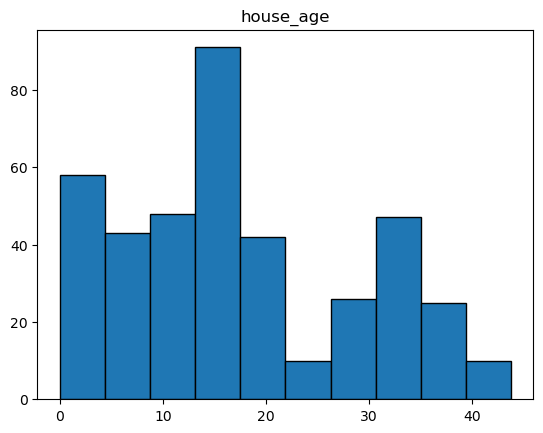

In [126]:
# Creates a histogram of the "house_age" column
df_outlier.hist(column="house_age", grid=False, edgecolor="black")

<Axes: >

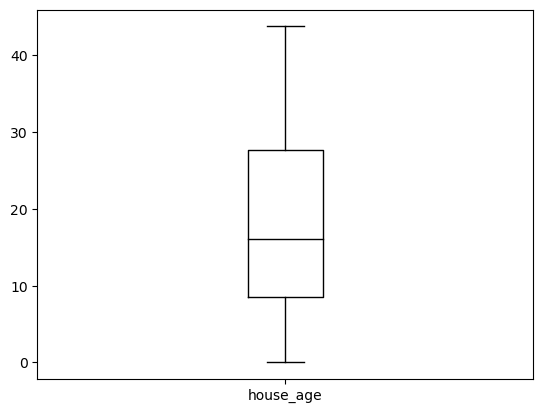

In [127]:
# Creates a box plot of the "house_age" column
df_outlier.boxplot(column="house_age", grid=False, color="black")

array([[<Axes: title={'center': 'distance_to_mrt'}>]], dtype=object)

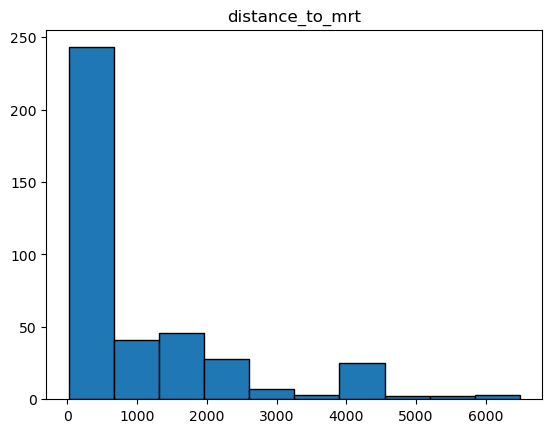

In [128]:
# Creates a histogram of the "distance_to_mrt" column
df_outlier.hist(column="distance_to_mrt", grid=False, edgecolor="black")

<Axes: >

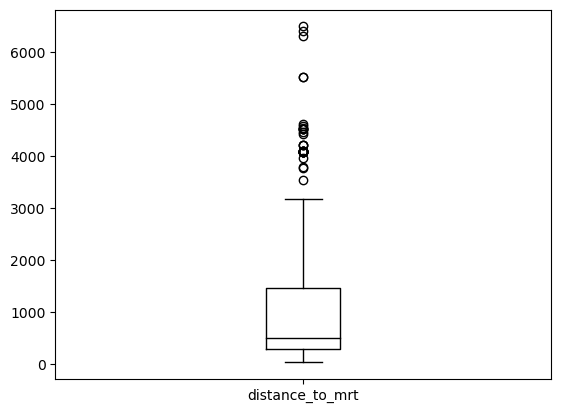

In [129]:
# Creates a box plot of the "distance_to_mrt" column
df_outlier.boxplot(column="distance_to_mrt", grid=False, color="black")

array([[<Axes: title={'center': 'num_convenience_stores'}>]], dtype=object)

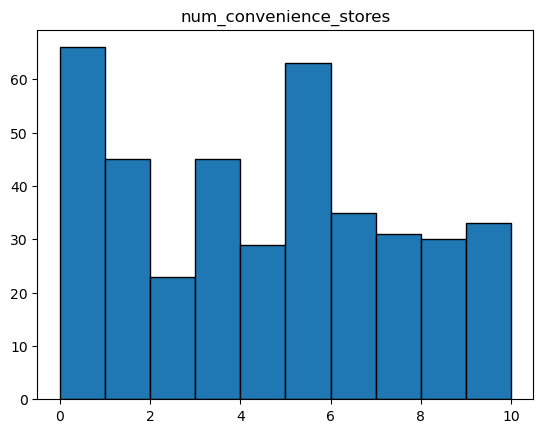

In [130]:
# Creates a histogram of the "num_convenience_stores" column
df_outlier.hist(column="num_convenience_stores", grid=False, edgecolor="black")

<Axes: >

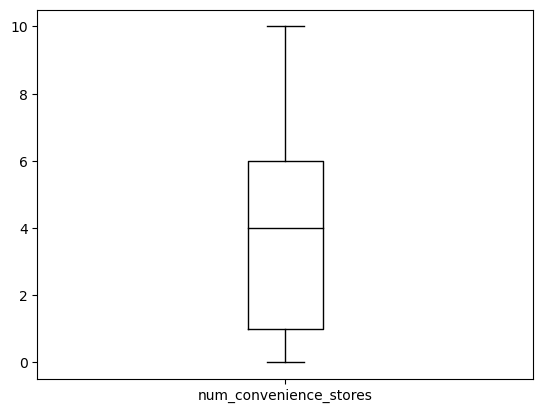

In [131]:
# Creates a box plot of the "num_convenience_stores" column
df_outlier.boxplot(column="num_convenience_stores", grid=False, color="black")

array([[<Axes: title={'center': 'price_unit_area'}>]], dtype=object)

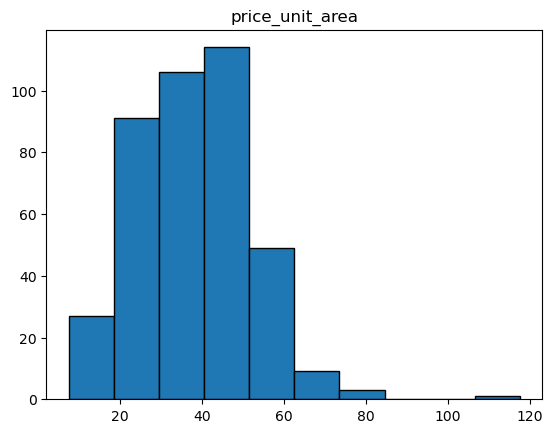

In [132]:
# Creates a histogram of the "price_unit_area" column
df_outlier.hist(column="price_unit_area", grid=False, edgecolor="black")

<Axes: >

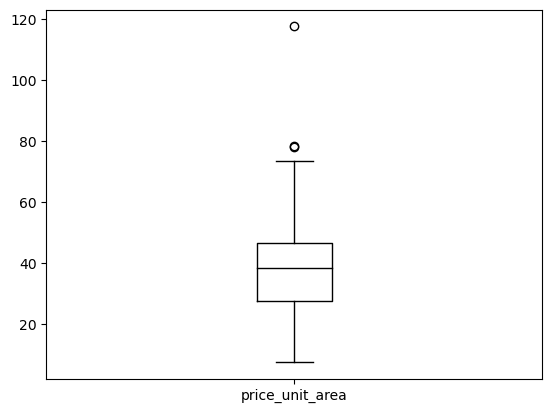

In [133]:
# Creates a box plot of the "price_unit_area" column
df_outlier.boxplot(column="price_unit_area", grid=False, color="black")

Text(0, 0.5, 'Distance to MRT')

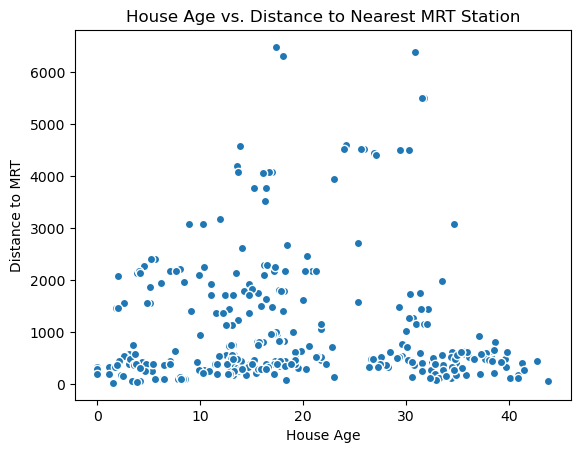

In [134]:
# Creates a scatter plot of the "house_age" column on the x-axis and the
# "distance_to_mrt" column on the y-axis
plt.scatter(df_outlier["house_age"], df_outlier["distance_to_mrt"], edgecolors="white")
plt.title("House Age vs. Distance to Nearest MRT Station")
plt.xlabel("House Age")
plt.ylabel("Distance to MRT")

Text(0, 0.5, 'Distance to MRT')

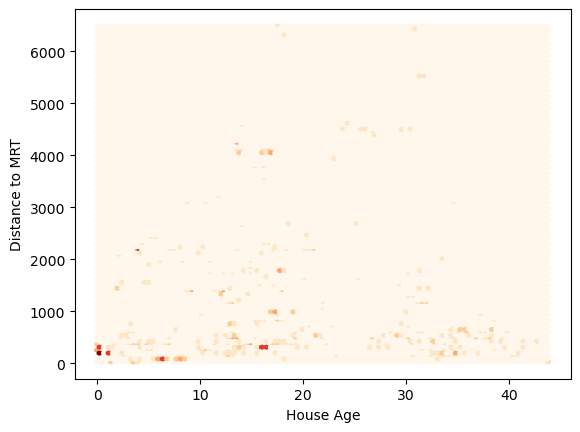

In [135]:
# Creates a hexagonal binning plot of the "house_age" column on the x-axis and
# the "distance_to_mrt" column on the y-axis
plt.hexbin(df_outlier["house_age"], df_outlier["distance_to_mrt"], cmap="OrRd")
plt.xlabel("House Age")
plt.ylabel("Distance to MRT")

Text(0, 0.5, 'Number of Convenience Stores')

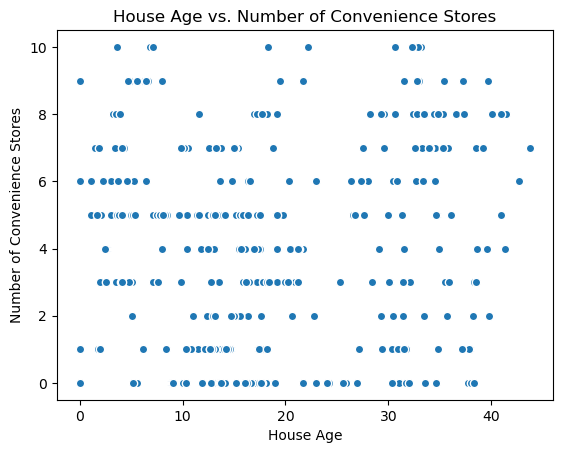

In [136]:
# Creates a scatter plot of the "house_age" column on the x-axis and the
# "num_convenience_stores" column on the y-axis
plt.scatter(df_outlier["house_age"], df_outlier["num_convenience_stores"], edgecolors="white")
plt.title("House Age vs. Number of Convenience Stores")
plt.xlabel("House Age")
plt.ylabel("Number of Convenience Stores")

Text(0, 0.5, 'Number of Convenience Stores')

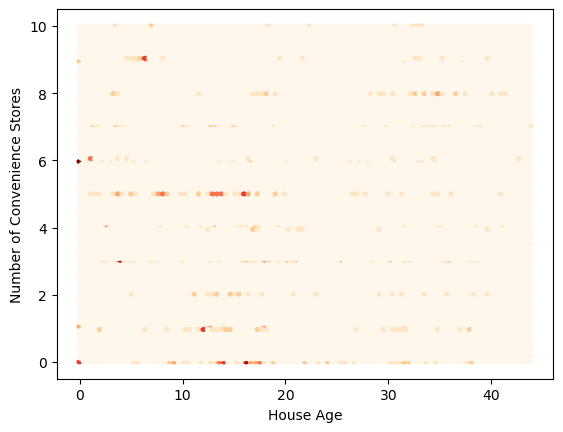

In [137]:
# Creates a hexagonal binning plot of the "house_age" column on the x-axis and
# the "num_convenience_stores" column on the y-axis
plt.hexbin(df_outlier["house_age"], df_outlier["num_convenience_stores"], cmap="OrRd")
plt.xlabel("House Age")
plt.ylabel("Number of Convenience Stores")

Text(0, 0.5, 'Price of Unit Area')

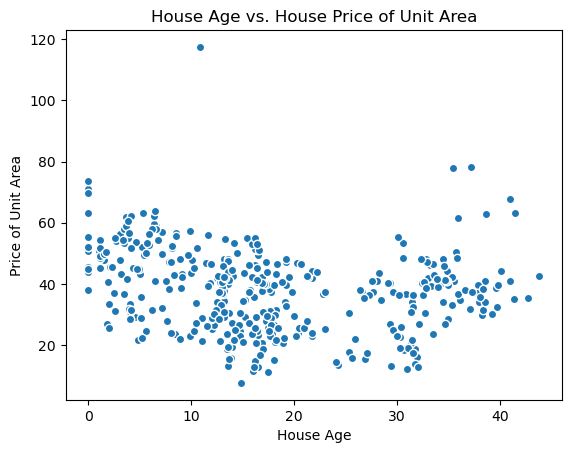

In [138]:
# Creates a scatter plot of the "house_age" column on the x-axis and the
# "price_unit_area" column on the y-axis
plt.scatter(df_outlier["house_age"], df_outlier["price_unit_area"], edgecolors="white")
plt.title("House Age vs. House Price of Unit Area")
plt.xlabel("House Age")
plt.ylabel("Price of Unit Area")

Text(0, 0.5, 'Price of Unit Area')

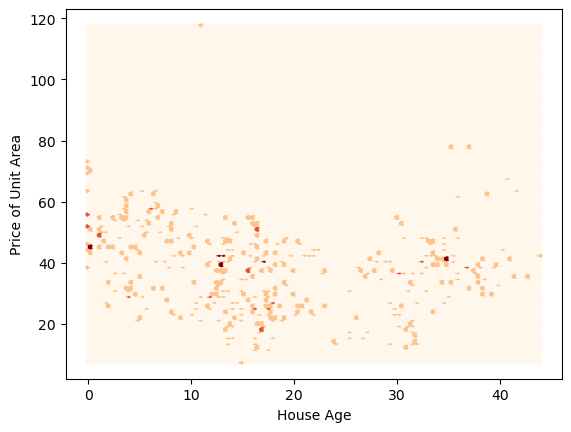

In [139]:
# Creates a hexagonal binning plot of the "house_age" column on the x-axis and
# the "price_unit_area" column on the y-axis
plt.hexbin(df_outlier["house_age"], df_outlier["price_unit_area"], cmap="OrRd")
plt.xlabel("House Age")
plt.ylabel("Price of Unit Area")

Text(0, 0.5, 'Number of Convenience Stores')

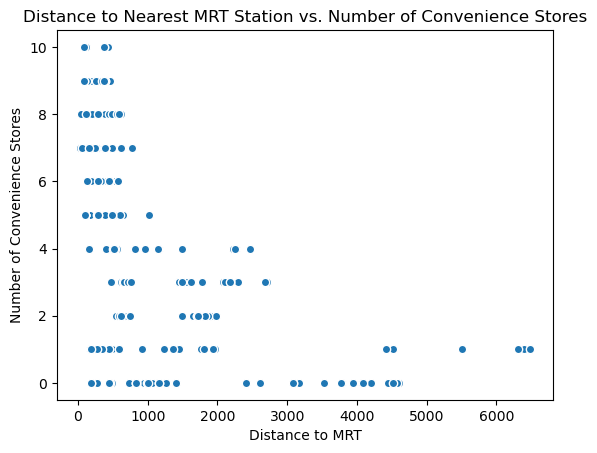

In [140]:
# Creates a scatter plot of the "distance_to_mrt" column on the x-axis and the
# "num_convenience_stores" column on the y-axis
plt.scatter(df_outlier["distance_to_mrt"], df_outlier["num_convenience_stores"], edgecolors="white")
plt.title("Distance to Nearest MRT Station vs. Number of Convenience Stores")
plt.xlabel("Distance to MRT")
plt.ylabel("Number of Convenience Stores")

Text(0, 0.5, 'Number of Convenience Stores')

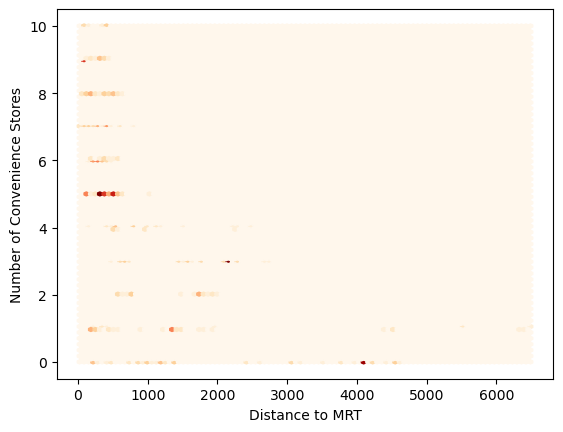

In [141]:
# Creates a hexagonal binning plot of the "distance_to_mrt" column on the x-axis
# and the "num_convenience_stores" column on the y-axis
plt.hexbin(df_outlier["distance_to_mrt"], df_outlier["num_convenience_stores"], cmap="OrRd")
plt.xlabel("Distance to MRT")
plt.ylabel("Number of Convenience Stores")

Text(0, 0.5, 'Price of Unit Area')

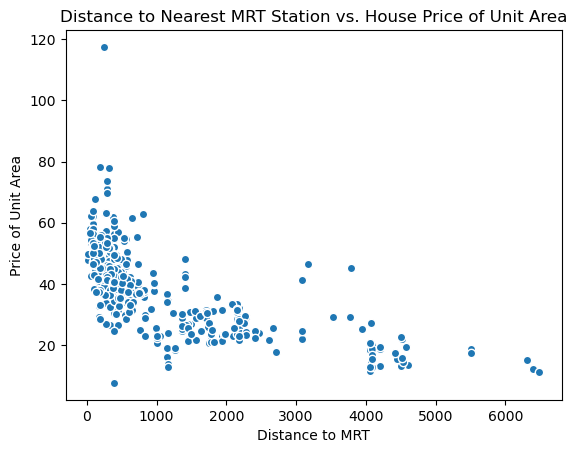

In [142]:
# Creates a scatter plot of the "distance_to_mrt" column on the x-axis and the
# "price_unit_area" column on the y-axis
plt.scatter(df_outlier["distance_to_mrt"], df_outlier["price_unit_area"], edgecolors="white")
plt.title("Distance to Nearest MRT Station vs. House Price of Unit Area")
plt.xlabel("Distance to MRT")
plt.ylabel("Price of Unit Area")

Text(0, 0.5, 'Price of Unit Area')

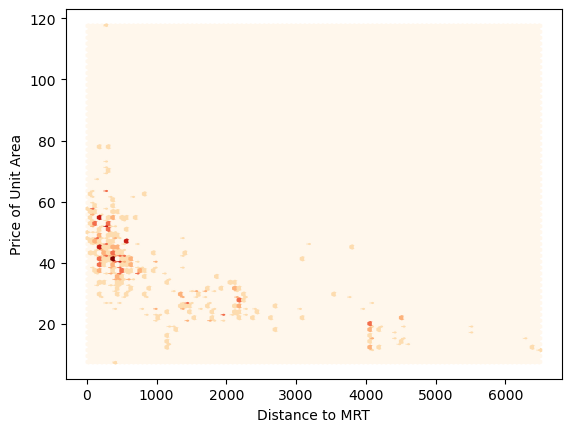

In [143]:
# Creates a hexagonal binning plot of the "distance_to_mrt" column on the x-axis
# and the "price_unit_area" column on the y-axis
plt.hexbin(df_outlier["distance_to_mrt"], df_outlier["price_unit_area"], cmap="OrRd")
plt.xlabel("Distance to MRT")
plt.ylabel("Price of Unit Area")

Text(0, 0.5, 'Price of Unit Area')

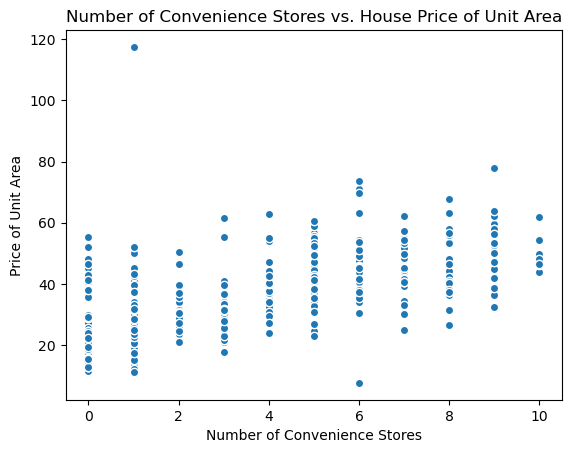

In [144]:
# Creates a scatter plot of the "num_convenience_stores" column on the x-axis
# and the "price_unit_area" column on the y-axis
plt.scatter(df_outlier["num_convenience_stores"], df_outlier["price_unit_area"], edgecolors="white")
plt.title("Number of Convenience Stores vs. House Price of Unit Area")
plt.xlabel("Number of Convenience Stores")
plt.ylabel("Price of Unit Area")

Text(0, 0.5, 'Price of Unit Area')

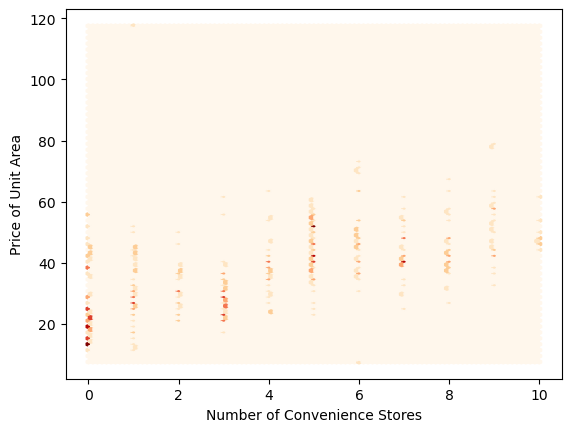

In [145]:
# Creates a hexagonal binning plot of the "num_convenience_stores" column on the
# x-axis and the "price_unit_area" column on the y-axis
plt.hexbin(df_outlier["num_convenience_stores"], df_outlier["price_unit_area"], cmap="OrRd")
plt.xlabel("Number of Convenience Stores")
plt.ylabel("Price of Unit Area")

In [147]:
# Writes data from transformed DataFrame to a new excel sheet
df_outlier.to_excel("../../data/processed/real_estate.xlsx")